In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [2]:
class Mandel:
    def __init__(self, pixels=50, bounds=25, itermax=25):
        self.pixels = pixels
        self.bounds = bounds
        self.itermax = itermax
        self.img = np.zeros((pixels, pixels))
        self.xbnds = [-2,0.47]
        self.ybnds = [-1.12,1.12]
        self.xzoombnds = np.linspace(self.xbnds[0], self.xbnds[1], 4)
        self.yzoombnds = np.linspace(self.ybnds[0], self.ybnds[1], 4)

    def __call__(self):
        self.gen()

    def zoom(self, x, y):
        if x < 0 or x > 2: return
        if y < 0 or y > 2: return
        self.xbnds = [self.xzoombnds[x], self.xzoombnds[x+1]]
        self.ybnds = [self.yzoombnds[y], self.yzoombnds[y+1]]
        self.xzoombnds = np.linspace(self.xbnds[0], self.xbnds[1], 4)
        self.yzoombnds = np.linspace(self.ybnds[0], self.ybnds[1], 4)
        self.gen(self.xbnds, self.ybnds)

    def gen(self, xbnds=[-2,0.47],ybnds=[-1.12,1.12]):
        X = np.linspace(xbnds[0], xbnds[1], self.pixels)
        Y = np.linspace(ybnds[0], ybnds[1], self.pixels)
        for x in range(self.pixels):
            for y in range(self.pixels):
                c = complex(X[x],Y[y])
                def f(z): return z**2 + c
                z = 0; i = 0
                while abs(z) < self.bounds and i < self.itermax:
                    z = f(z)
                    i += 1
                cvrg_conf = i / self.itermax
                self.img[x,y] = 255 * cvrg_conf
    
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.imshow(self.img, cmap='gray', vmin=0, vmax=255)

In [3]:
m = Mandel(500, 100, 100)

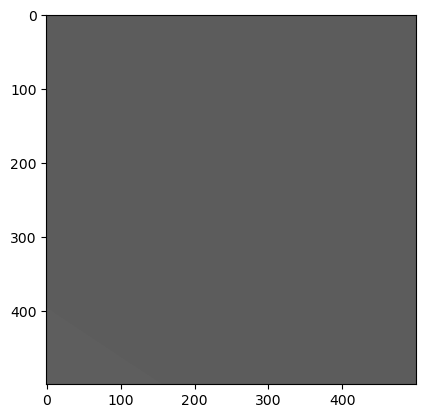

In [20]:
m.zoom(0,0)
m.plot()